In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
data_csv = pd.read_csv("../data/raw/gsearch_jobs.csv")

data_csv.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']"
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']"


In [8]:
data_csv.shape

(61953, 27)

In [6]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61953 non-null  int64  
 1   index                61953 non-null  int64  
 2   title                61953 non-null  object 
 3   company_name         61953 non-null  object 
 4   location             61916 non-null  object 
 5   via                  61944 non-null  object 
 6   description          61953 non-null  object 
 7   extensions           61953 non-null  object 
 8   job_id               61953 non-null  object 
 9   thumbnail            38194 non-null  object 
 10  posted_at            61763 non-null  object 
 11  schedule_type        61707 non-null  object 
 12  work_from_home       27980 non-null  object 
 13  salary               10088 non-null  object 
 14  search_term          61953 non-null  object 
 15  date_time            61953 non-null 

In [9]:
data_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,61953.0,30976.000000,17884.434951,0.00,15488.000,30976.0,46464.0,61952.0
index,61953.0,1139.077333,690.256113,0.00,553.000,1111.0,1685.0,3228.0
commute_time,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_avg,10088.0,42100.231239,55893.993519,7.25,31.500,60.0,92500.0,550000.0
salary_min,9512.0,34846.281874,45843.034891,8.00,19.520,50.0,77000.0,450000.0
salary_max,9512.0,50487.856787,67366.522273,10.00,45.000,75.0,110000.0,850000.0
salary_hourly,5900.0,40.539588,22.214540,7.25,23.265,33.5,55.0,300.0
salary_yearly,4069.0,104115.406718,36024.388492,29289.84,80000.180,96500.0,120000.0,550000.0
salary_standardized,10088.0,92289.425683,43277.933820,15080.00,62400.000,88400.0,117500.0,624000.0


In [11]:
missing_data = data_csv.isnull().sum().sort_values(ascending=False)
print(missing_data)

commute_time           61953
salary_yearly          57884
salary_hourly          56053
salary_max             52441
salary_min             52441
salary                 51865
salary_standardized    51865
salary_avg             51865
salary_rate            51865
salary_pay             51865
work_from_home         33973
thumbnail              23759
schedule_type            246
posted_at                190
location                  37
via                        9
Unnamed: 0                 0
search_location            0
date_time                  0
search_term                0
index                      0
job_id                     0
extensions                 0
description                0
company_name               0
title                      0
description_tokens         0
dtype: int64


In [12]:
data_csv.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

# Univariate Analysis

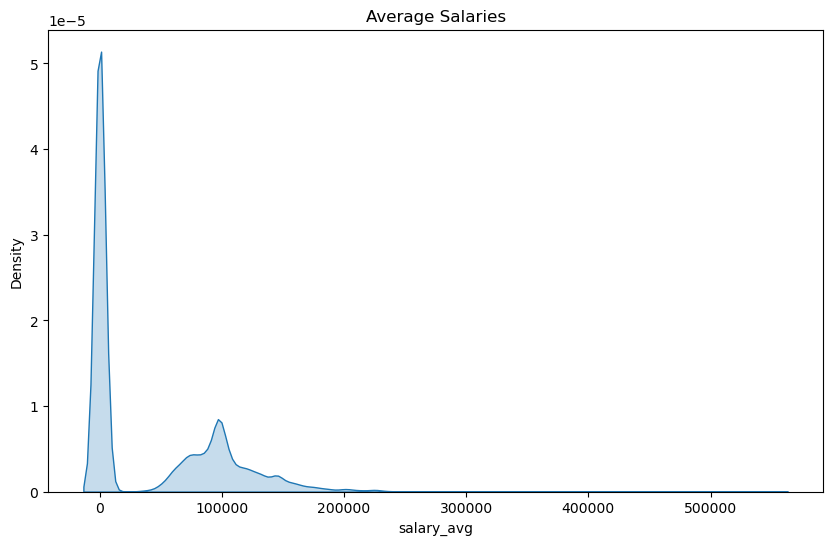

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data_csv['salary_avg'].dropna(), fill=True, bw_adjust=0.5)
plt.title('Average Salaries')
plt.show()

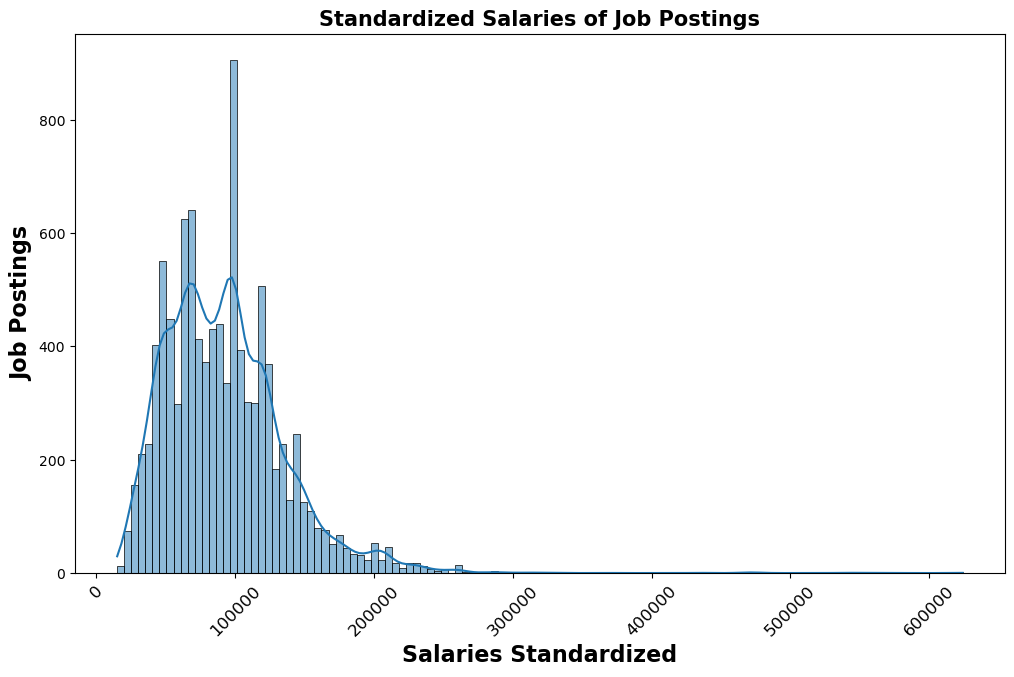

In [43]:
plt.figure(figsize=(12, 7))

sns.histplot(data=data_csv, x='salary_standardized', kde=True)
plt.title('Standardized Salaries of Job Postings', weight='bold', fontsize=15)
plt.xlabel('Salaries Standardized', fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('Job Postings', weight='bold', fontsize=16)
plt.show()

# Standardizing columns

In [25]:
	
# function for standardizing job titles
def normalize_title(title):
    title = title.lower() # makes lowercase
    title = re.sub(r'(sr\.?|senior)', 'senior', title) # standardize senior
    title = re.sub(r'(jr\.?|junior)', 'junior', title) # standardize junior
    title = re.sub(r'\s*-\s*.*$', '', title) # removes suffices like '-contract to hire'
    title = re.sub(r'[^\w\s]', '', title) # removes punctiation
    title = title.strip()
    return title

In [26]:
data_csv['title'] = data_csv['title'].apply(normalize_title)

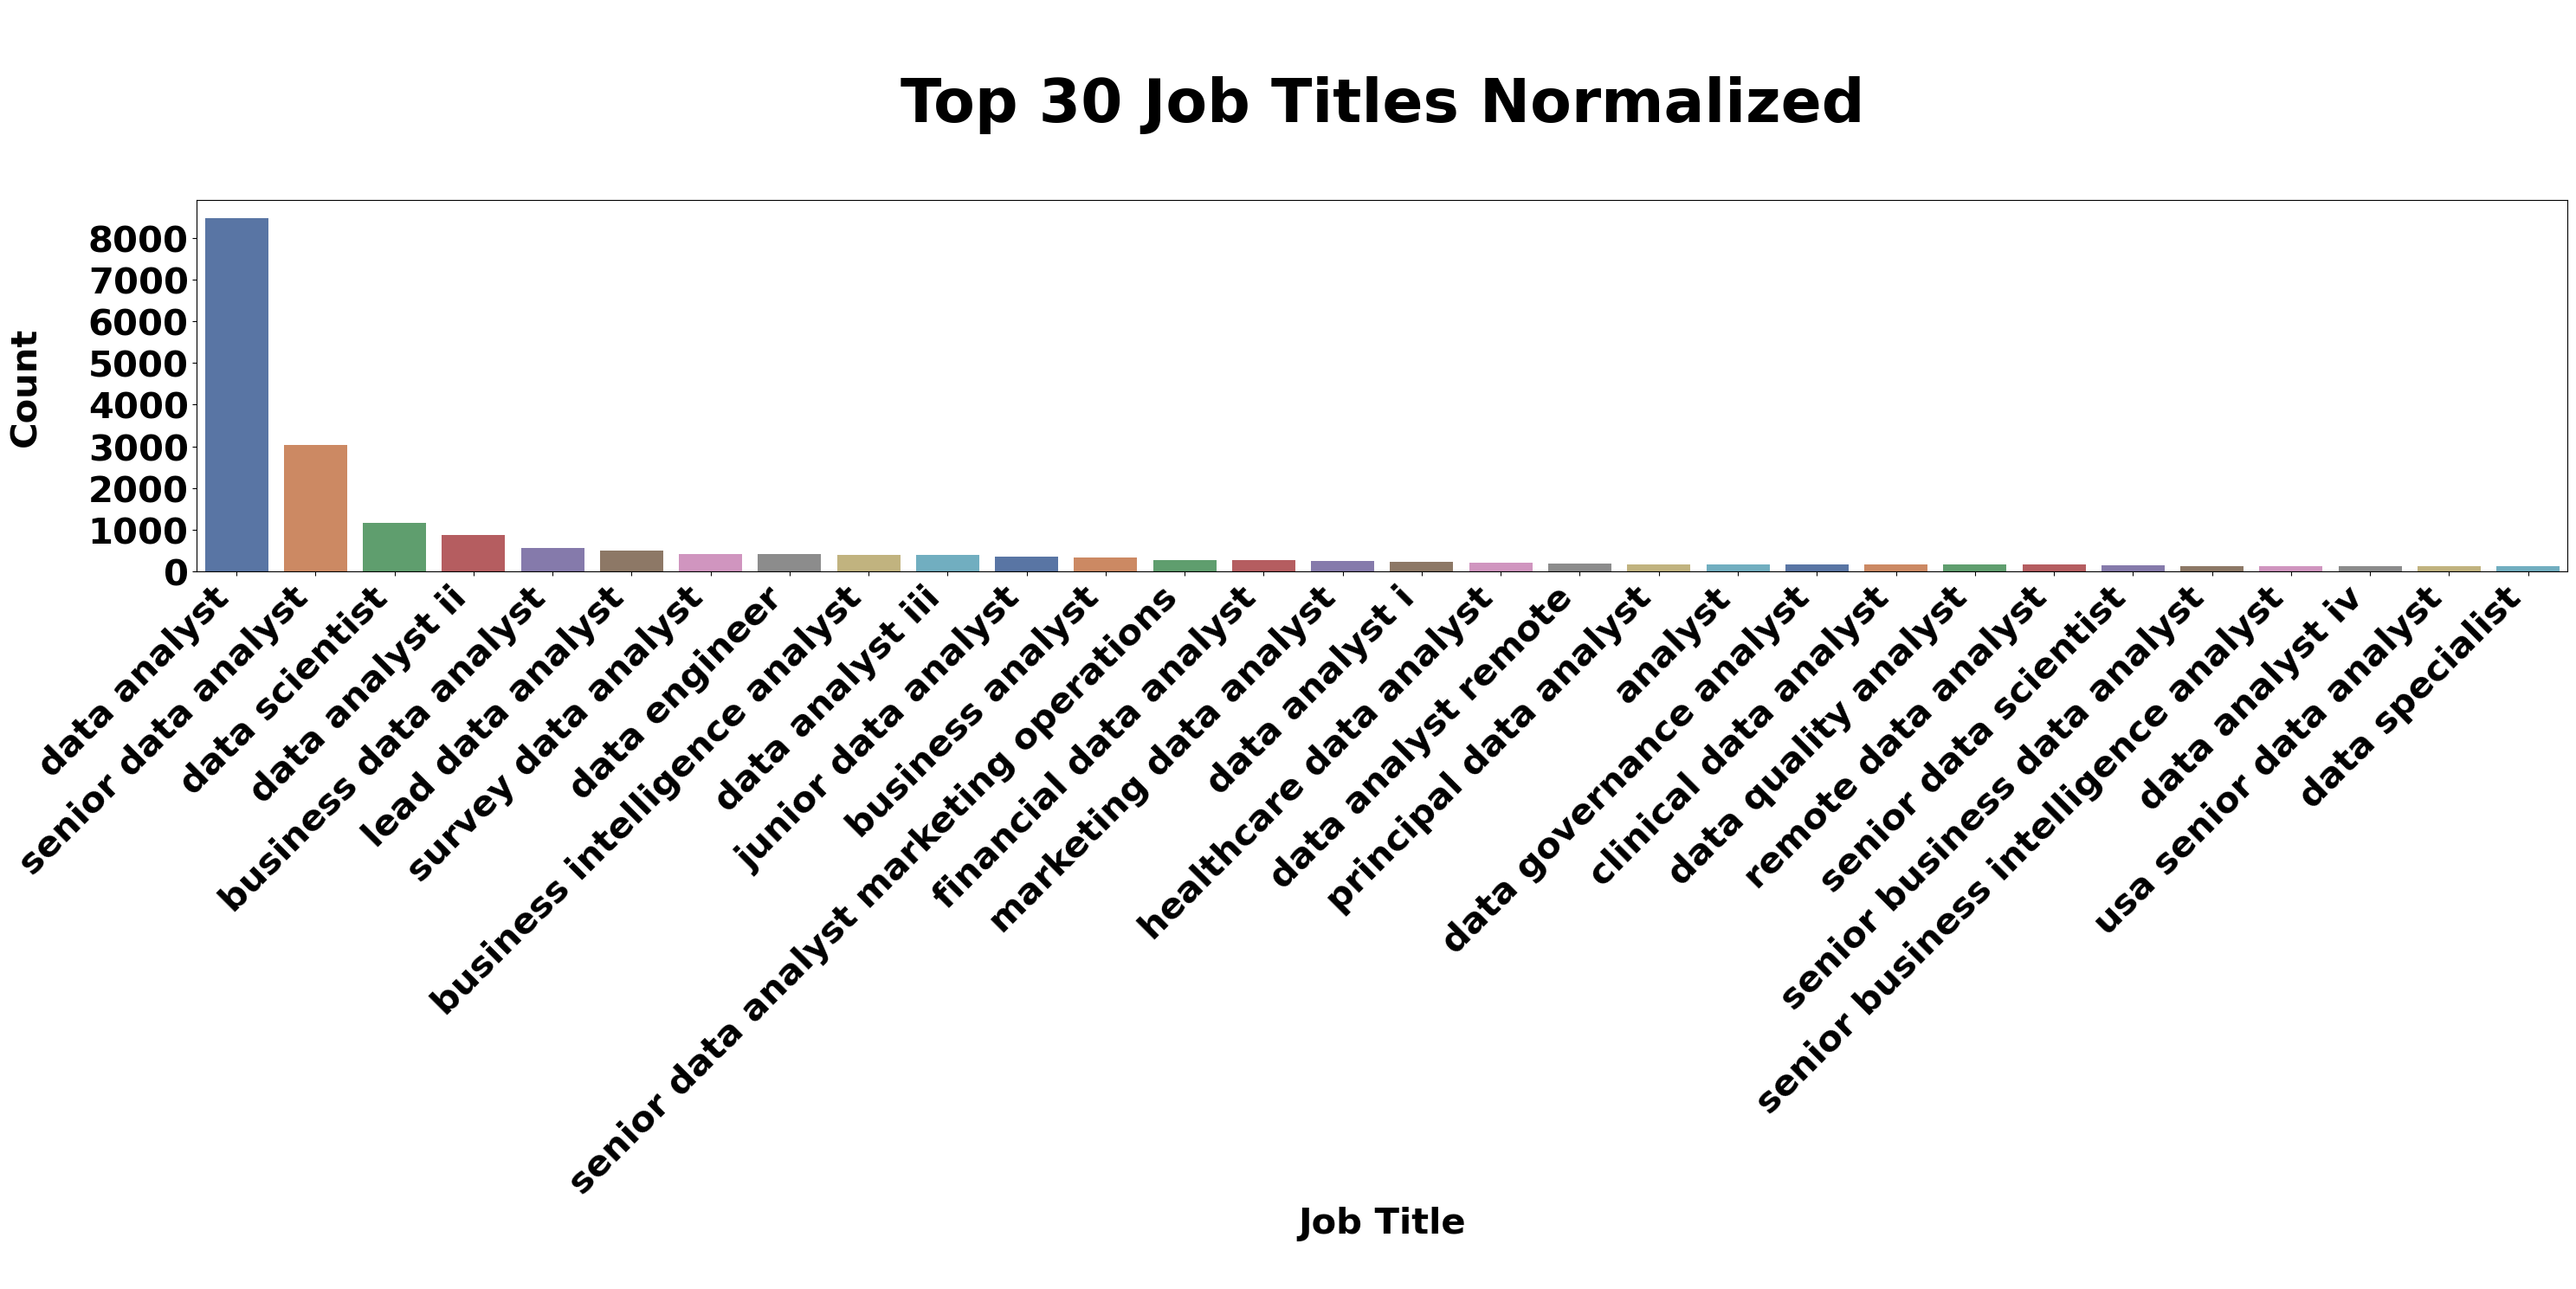

In [27]:
title_counts = data_csv['title'].value_counts().head(30)

plt.figure(figsize=(30, 15))
sns.barplot(x=title_counts.index, y=title_counts.values, hue=title_counts.index, palette='deep')
plt.xticks(rotation=45, ha='right')
plt.title('\nTop 30 Job Titles Normalized\n', weight='bold', fontsize=50)
plt.xlabel('Job Title\n', weight='bold', fontsize=30)
plt.xticks(weight='bold', fontsize=30)
plt.ylabel('Count\n', weight='bold', fontsize=30)
plt.yticks(weight='bold', fontsize=30)
plt.tight_layout()
plt.show()

In [28]:
data_csv['location'] = data_csv['location'].str.strip()

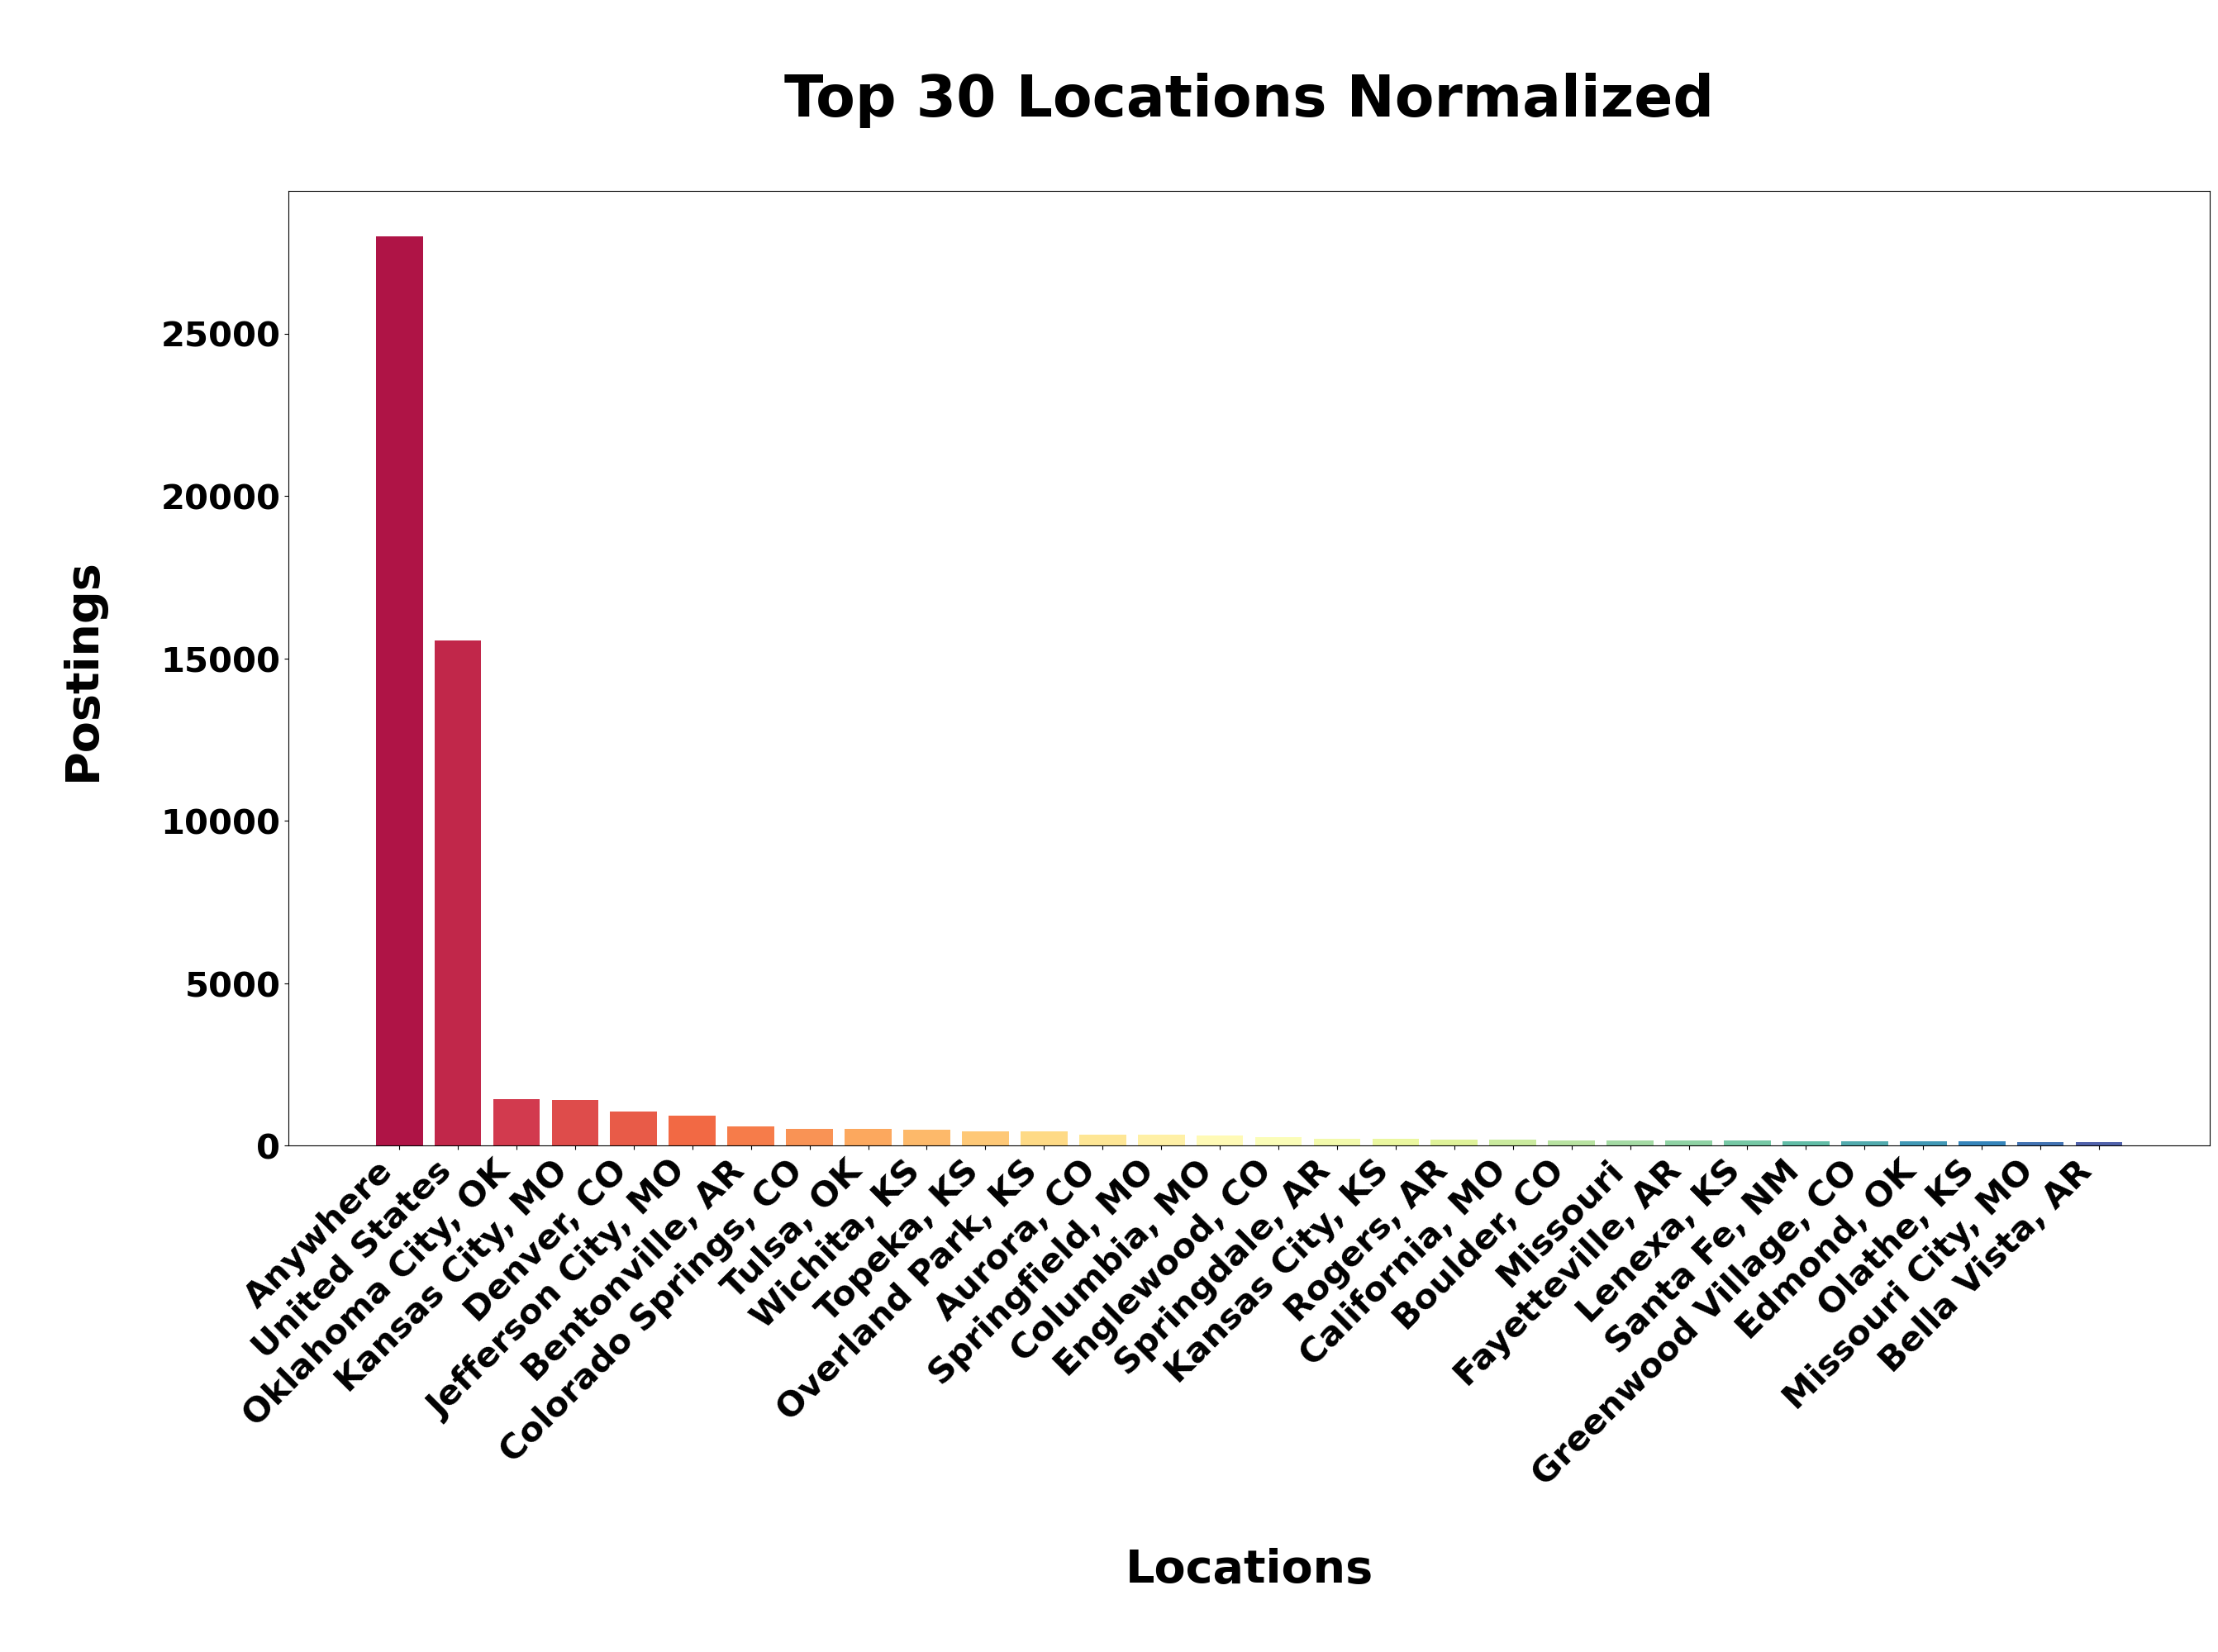

In [29]:
top_30_location = data_csv['location'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('Spectral',len(top_30_location))

plt.bar(top_30_location.index, top_30_location.values, color=colors1)
plt.title('\nTop 30 Locations Normalized\n', weight='bold', fontsize=50)
plt.xlabel('\nLocations\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

In [30]:
data_csv['via'] = data_csv['via'].str.replace(r'^via\s+', '', regex=True).str.strip()

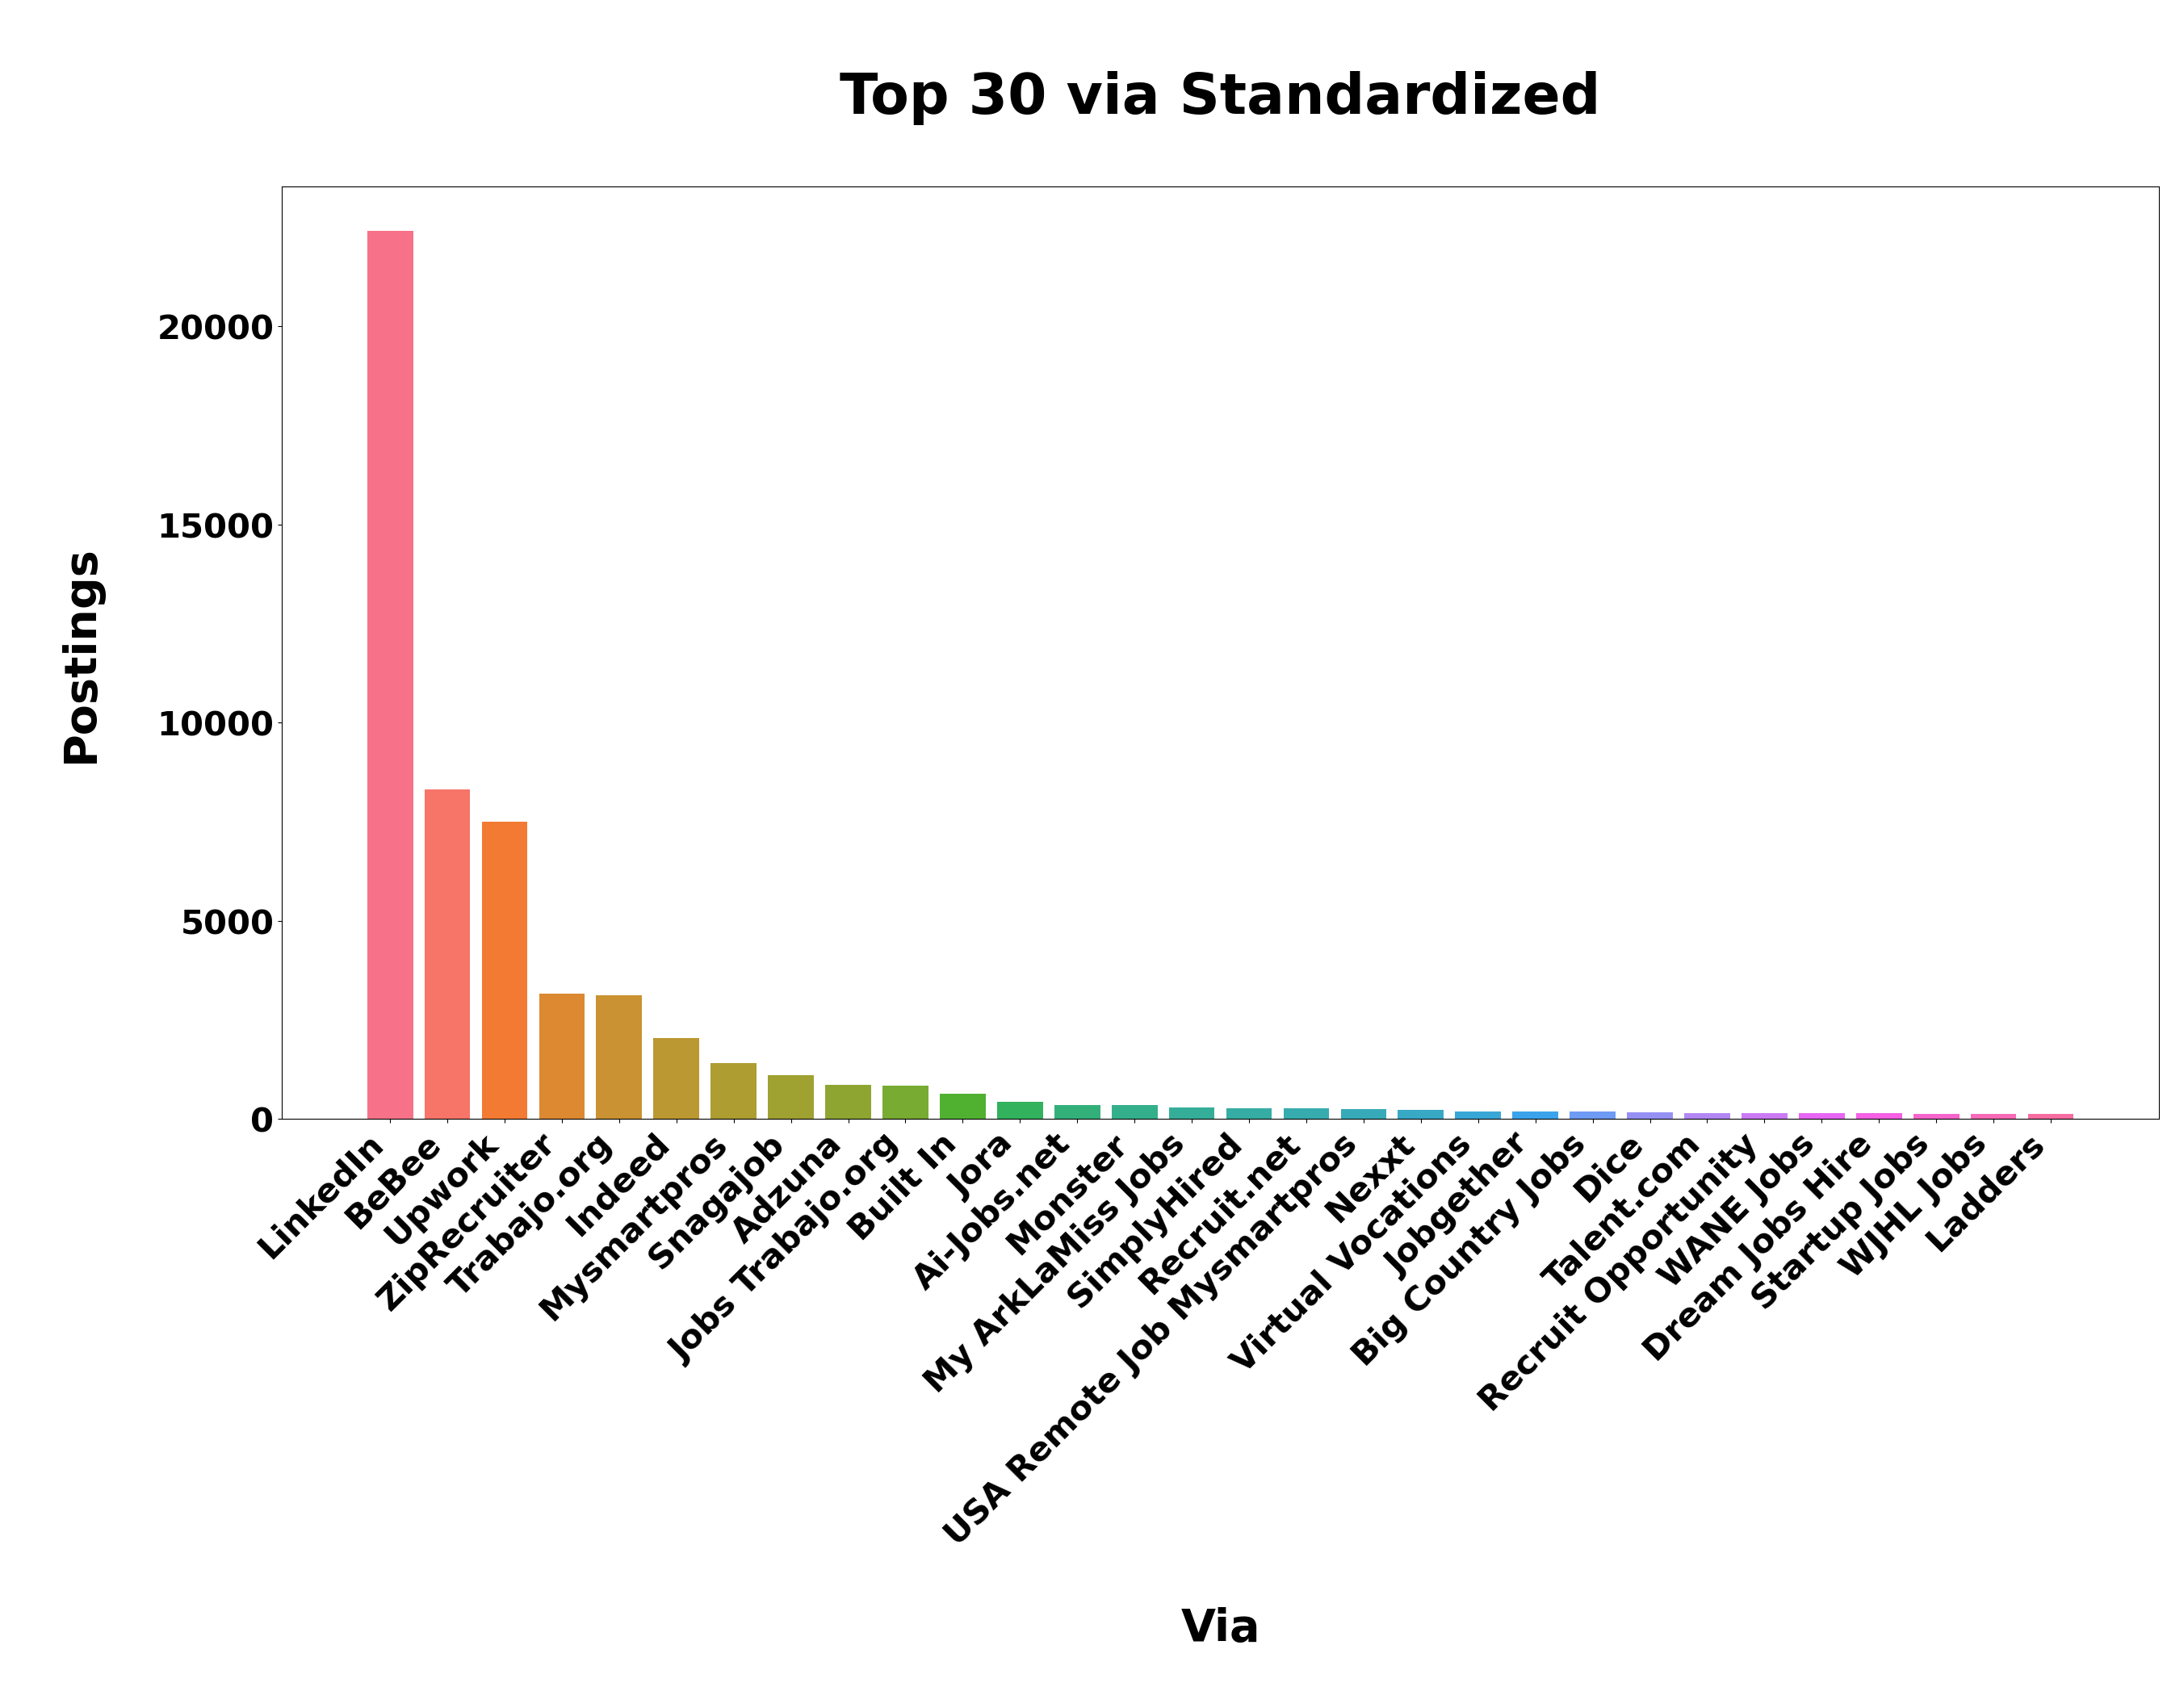

In [31]:
top_30_vias = data_csv['via'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors2 = sns.color_palette('husl',len(top_30_vias))

plt.bar(top_30_vias.index, top_30_vias.values, color=colors2)
plt.title('\nTop 30 via Standardized\n', weight='bold', fontsize=50)
plt.xlabel('\nVia\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

In [33]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean and tokenize while removing stop words
def clean_tokens(text):
    if pd.isnull(text):
        return []
    tokens = re.findall(r'\b[a-zA-Z]{2,}\b', text.lower())
    return [token for token in tokens if token not in stop_words]

data_csv['description_tks'] = data_csv['description'].apply(clean_tokens)

# Count remaining tokens
all_tokens = [token for tokens in data_csv['description_tks'] if tokens for token in tokens]
token_counts = Counter(all_tokens)

# Create a DataFrame
desc_df = pd.DataFrame(token_counts.items(), columns=['skill', 'count']).sort_values(by='count', ascending=False)

# Show top results
print(desc_df.head(10))

[nltk_data] Downloading package stopwords to /Users/sa22/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


          skill   count
5          data  660792
122  experience  249699
39     business  203157
230        work  165409
388    analysis  120452
268      skills  114742
17         team  105517
2     analytics   94744
19      ability   84217
128  management   81334


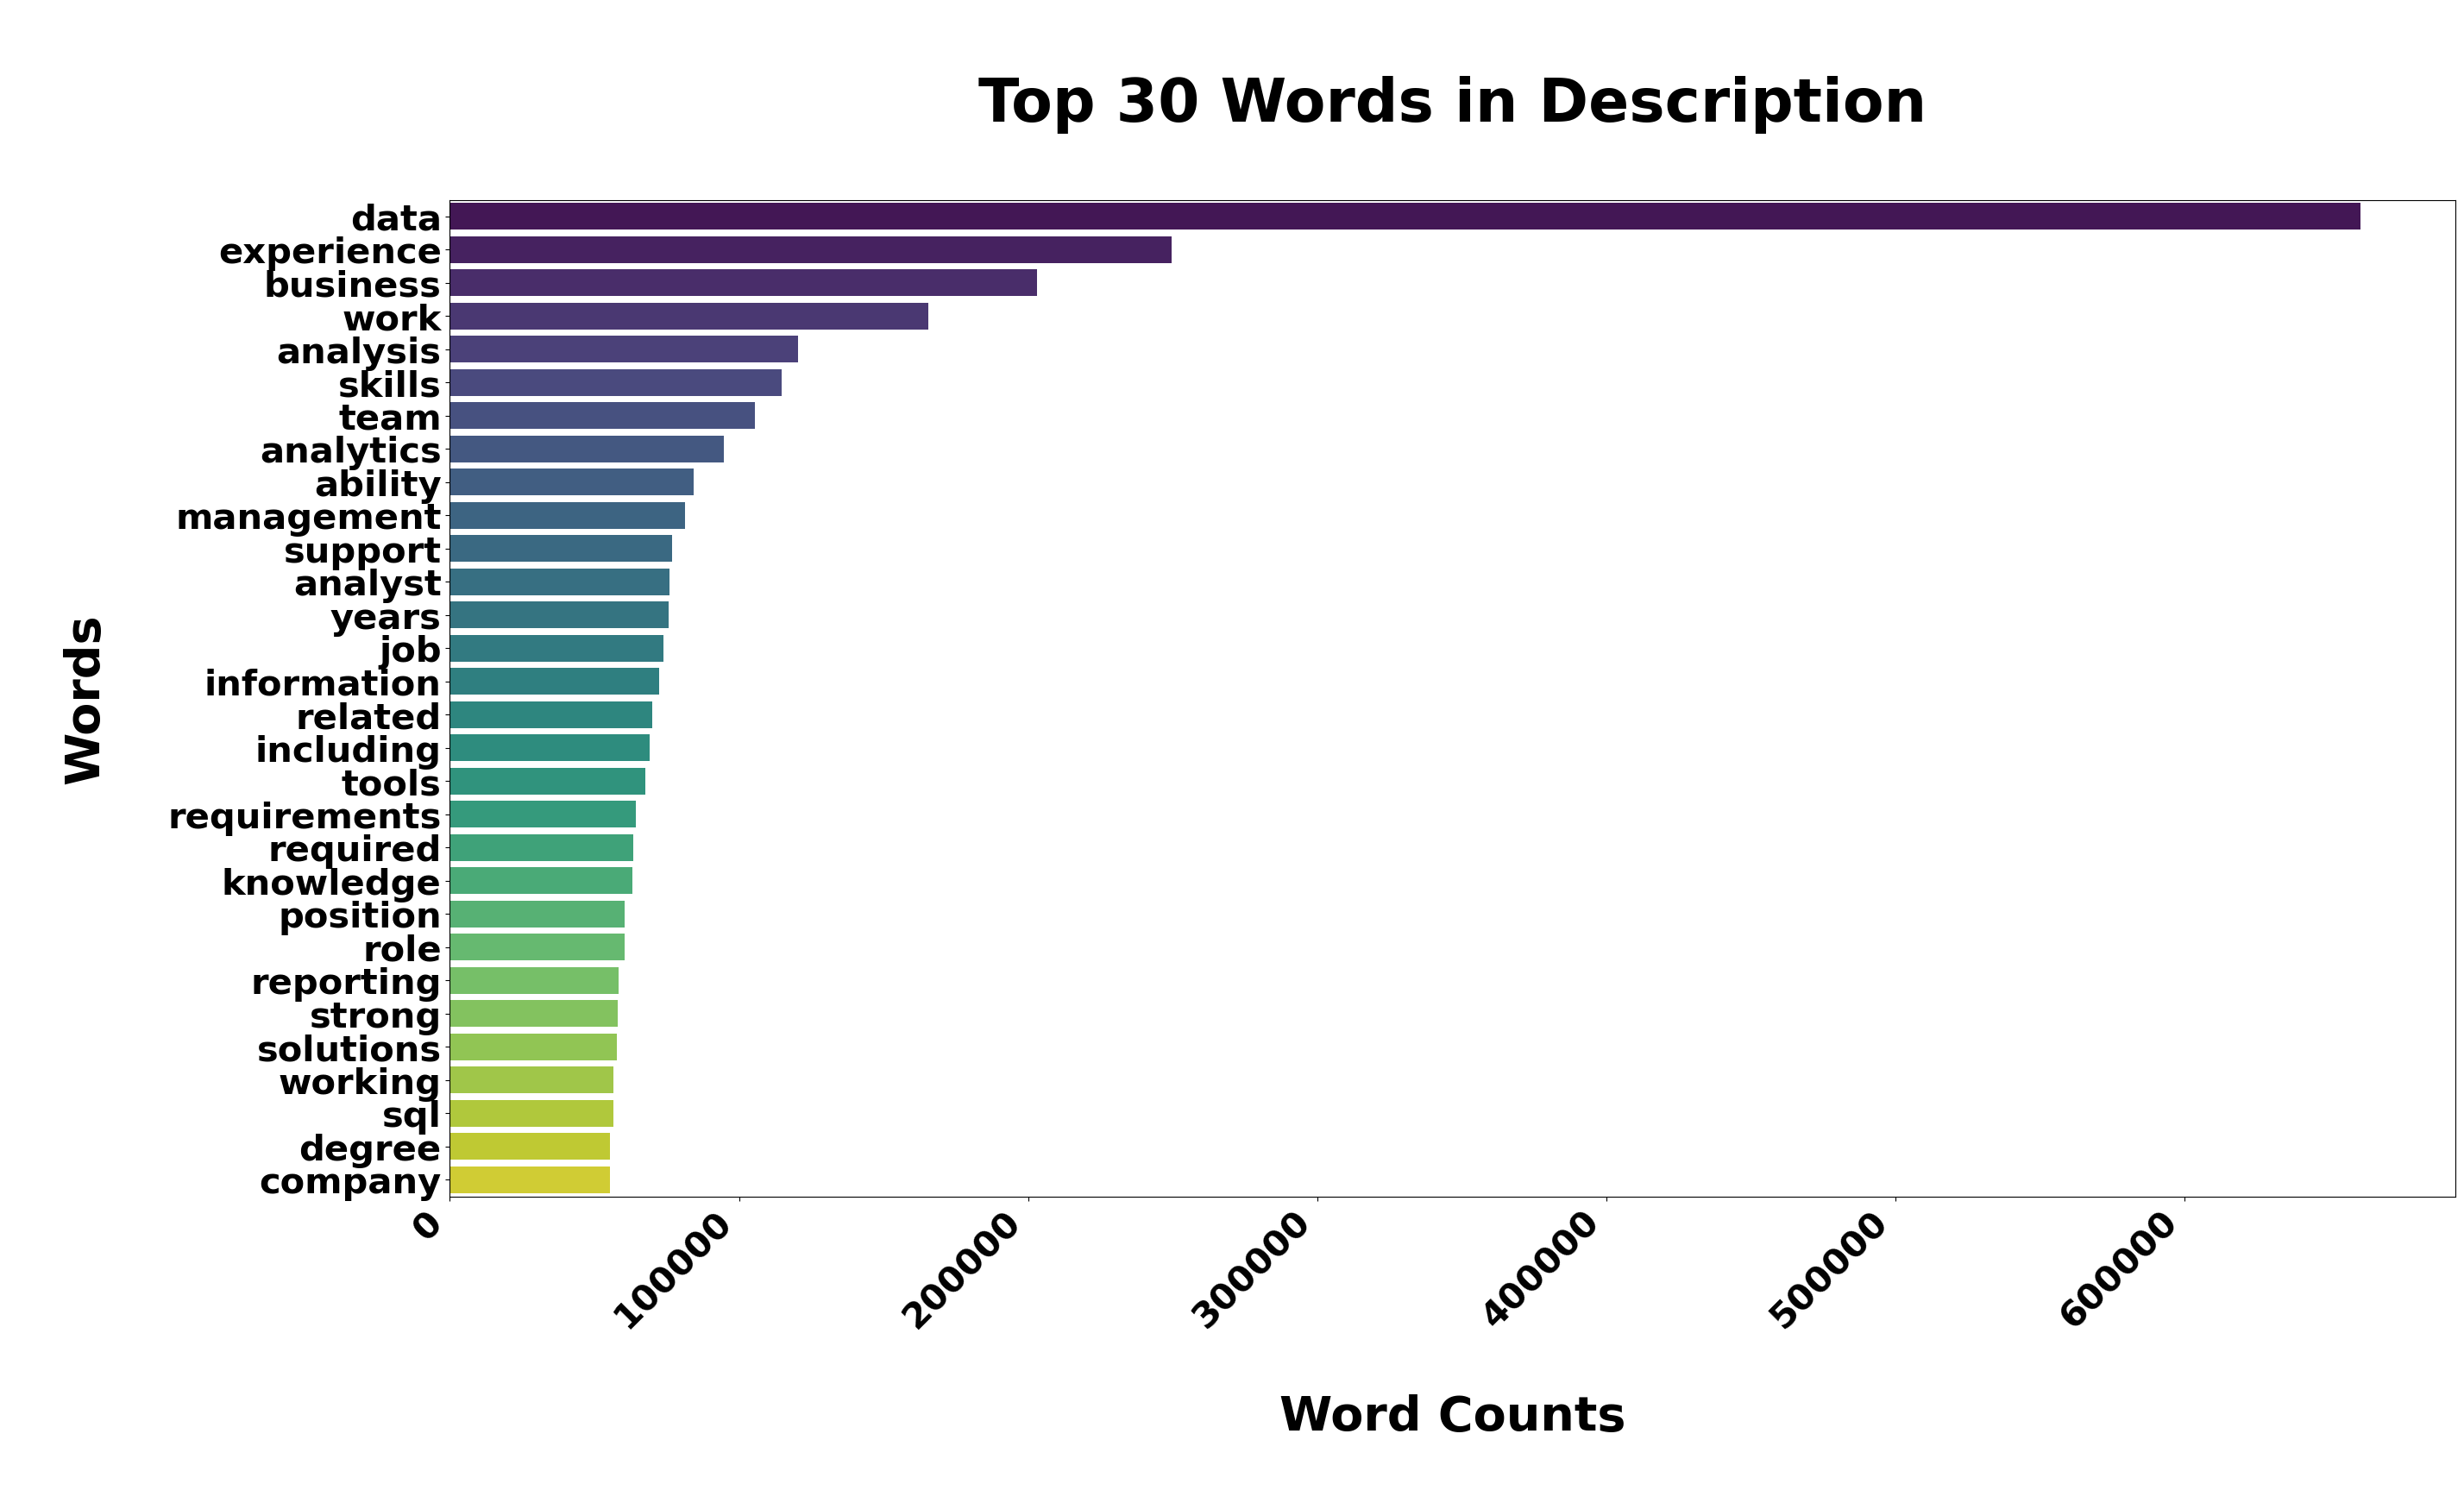

In [34]:
top_30_desc = desc_df.head(30)
plt.figure(figsize=(30, 15))

sns.barplot(data=top_30_desc, x='count', y='skill', hue='skill', palette='viridis')
plt.title('\nTop 30 Words in Description\n', weight='bold', fontsize=50)
plt.xlabel('\nWord Counts\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nWords\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

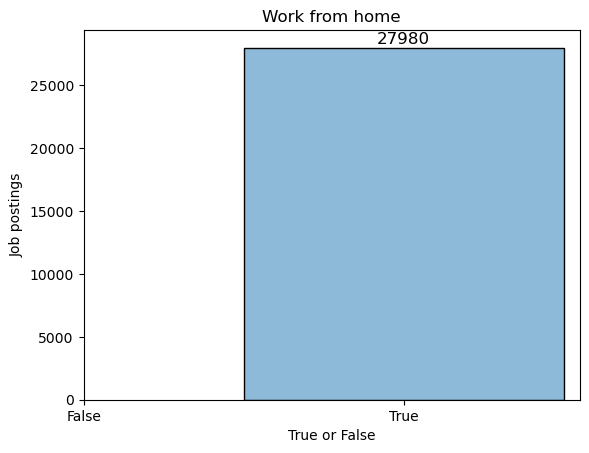

In [38]:
ax = sns.histplot(data=data_csv, x='work_from_home', kde=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=1)

plt.title('Work from home')
plt.xlabel('True or False')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.ylabel('Job postings')
plt.show

In [58]:
from matplotlib_venn import venn3
set_full_time = set(data_csv[data_csv['is_full-time'] == 1].index)
set_contractor = set(data_csv[data_csv['is_contractor'] == 1].index)
set_temp = set(data_csv[data_csv['is_and_temp_work'] == 1].index)
# Plot the Venn diagram
plt.figure(figsize=(18, 16))
venn3([set_full_time, set_temp, set_contractor],
      set_labels=('Full-time', 'Contractor', 'Temp'))

plt.title('Overlap of Top 3 Schedule Types')
plt.show()

KeyError: 'is_full-time'

In [55]:
numer_features = data_csv.select_dtypes(include=['int64', 'float64']).columns
print(numer_features)

Index(['Unnamed: 0', 'index', 'commute_time', 'salary_avg', 'salary_min',
       'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized'],
      dtype='object')


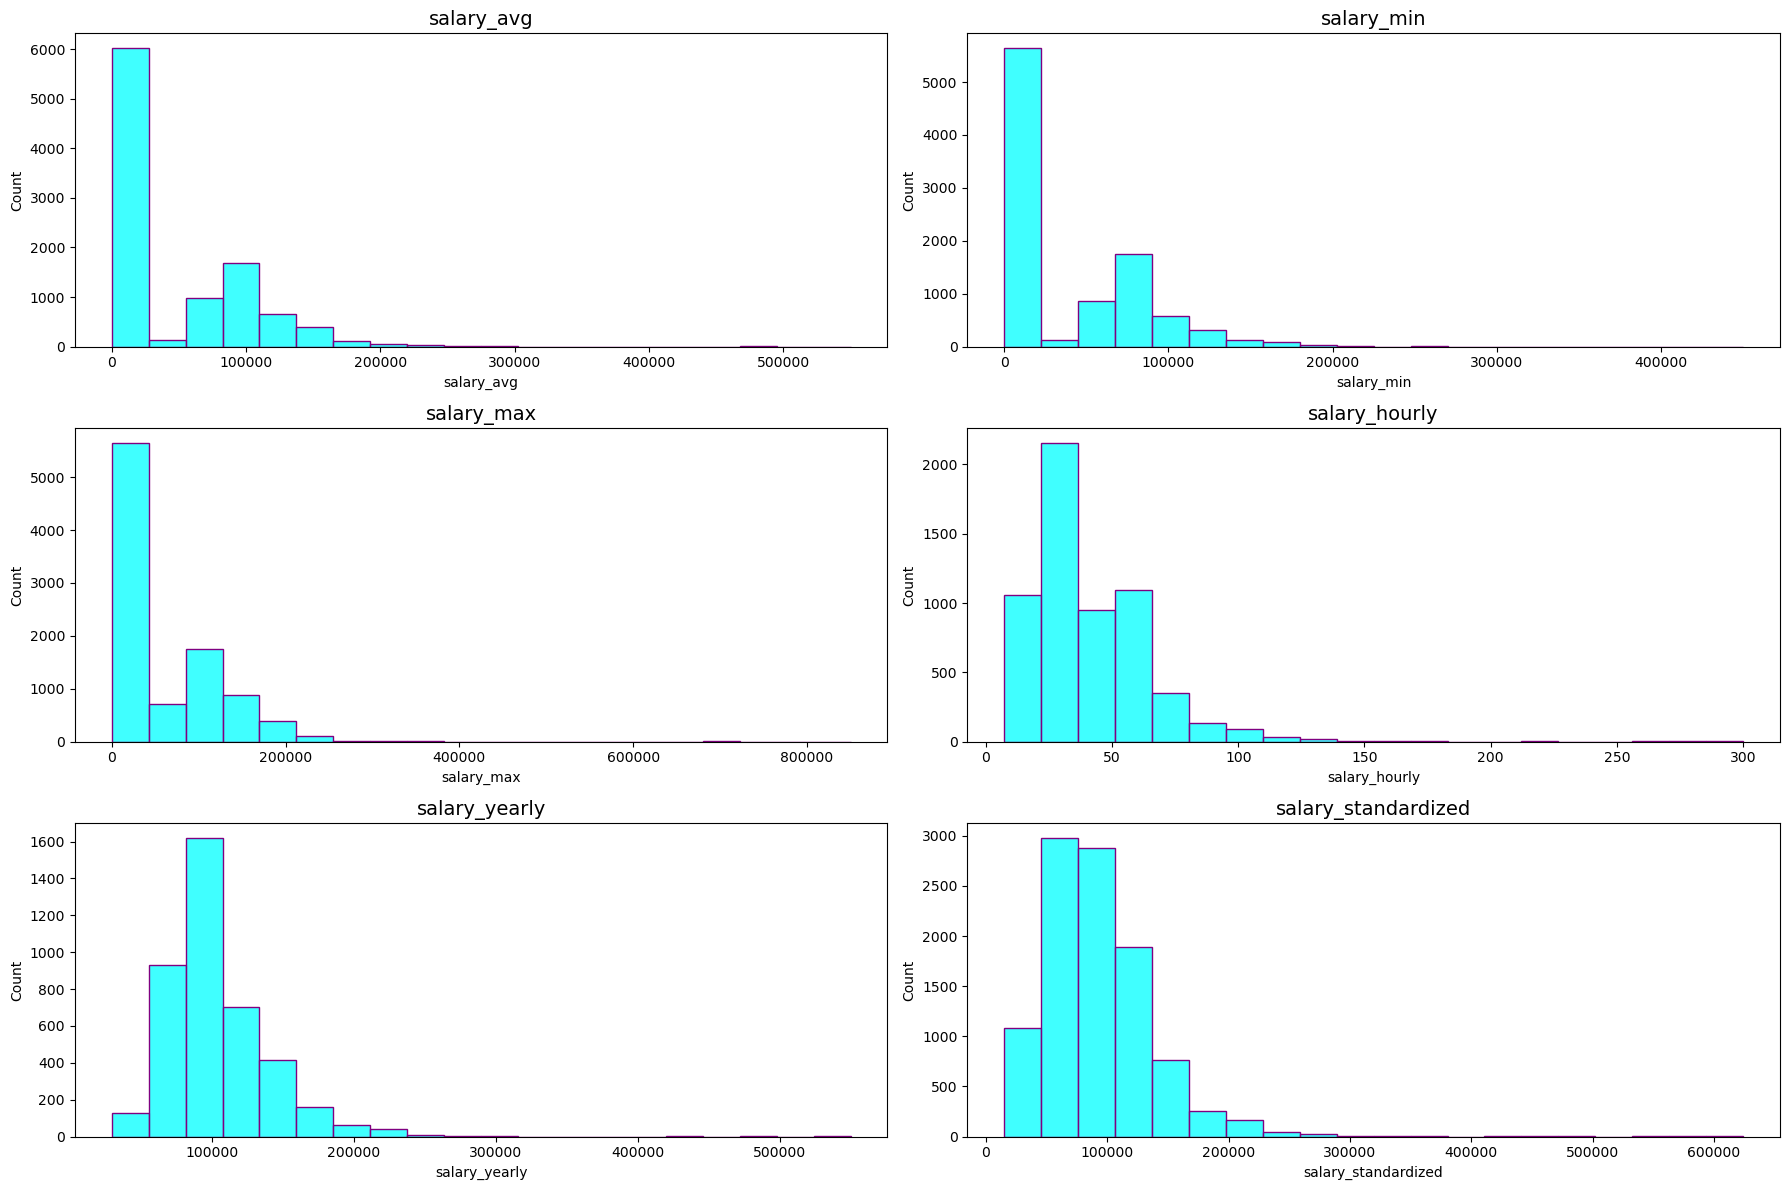

In [56]:
# Define numerical features to exclude
exclude_cols = ['Unnamed: 0', 'index', 'commute_time', 'is_', 'is_and_contractor', 
                'is_and_internship', 'is_and_per_diem', 'is_and_temp_work', 
                'is_contractor', 'is_full-time', 'is_internship', 'is_part-time', 
                'is_per_diem', 'is_temp_work', 'is_volunteer']

# Filter numerical features (assuming numer_features is already defined)
numer_features = [col for col in numer_features if col not in exclude_cols]

# Grid setup
n_cols = 2
n_rows = (len(numer_features) + 1) // n_cols  # Dynamic row calculation
plt.figure(figsize=(18, 12)) 

# Loop through and plot each numeric feature
for i, col in enumerate(numer_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data_csv[col], bins=20, color='aqua', edgecolor='purple')
    plt.title(col, fontsize=14)

plt.tight_layout()
plt.show()

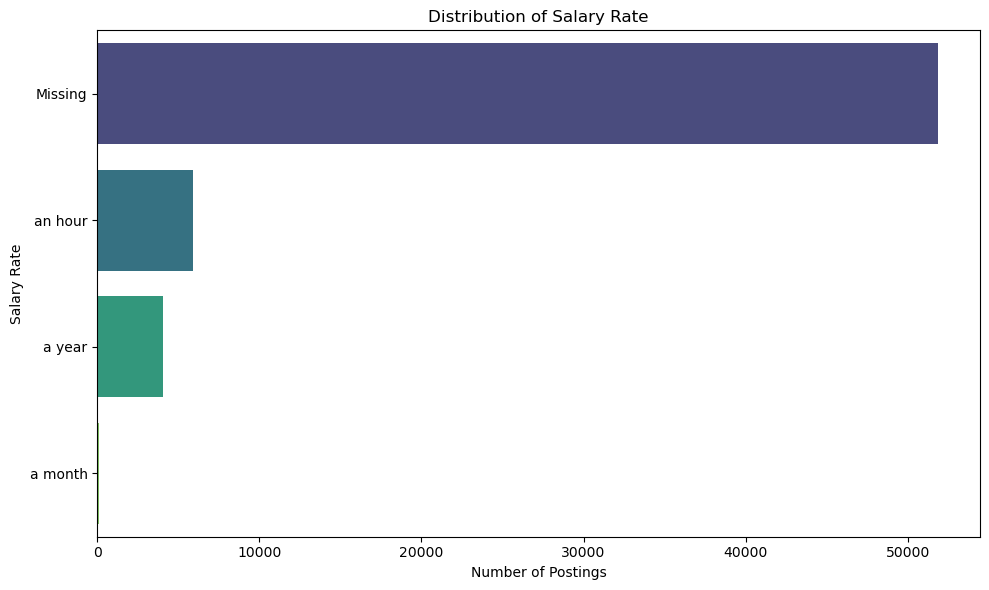

In [57]:
# Fill missing values in 'salary_rate' with 'Missing'
data_csv['salary_rate'] = data_csv['salary_rate'].fillna('Missing')

# Count the occurrences of each salary rate
salary_rate_counts = data_csv['salary_rate'].value_counts().reset_index()
salary_rate_counts.columns = ['salary_rate', 'count']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_rate_counts, x='count', y='salary_rate', hue='salary_rate', palette='viridis')
plt.title('Distribution of Salary Rate')
plt.xlabel('Number of Postings')
plt.ylabel('Salary Rate')
plt.tight_layout()
plt.show()

# Bivariate Analysis

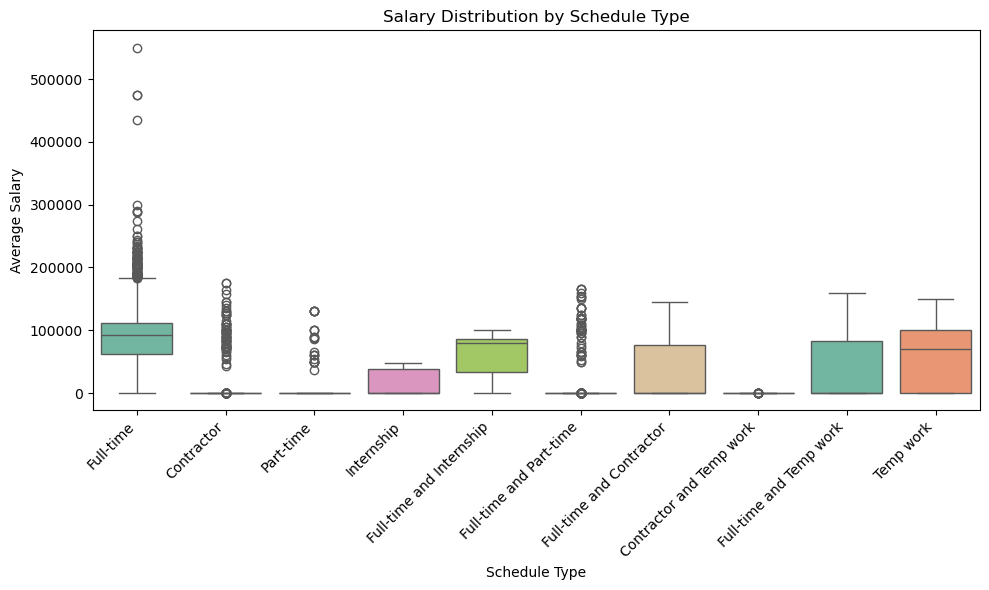

In [24]:
top_10 = data_csv['schedule_type'].value_counts().head(10).index

plt.figure(figsize=(10, 6))

sns.boxplot(data=data_csv[data_csv['schedule_type'].isin(top_10)], x='schedule_type', hue='schedule_type', y='salary_avg', palette='Set2')
plt.title('Salary Distribution by Schedule Type')
plt.xlabel('Schedule Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

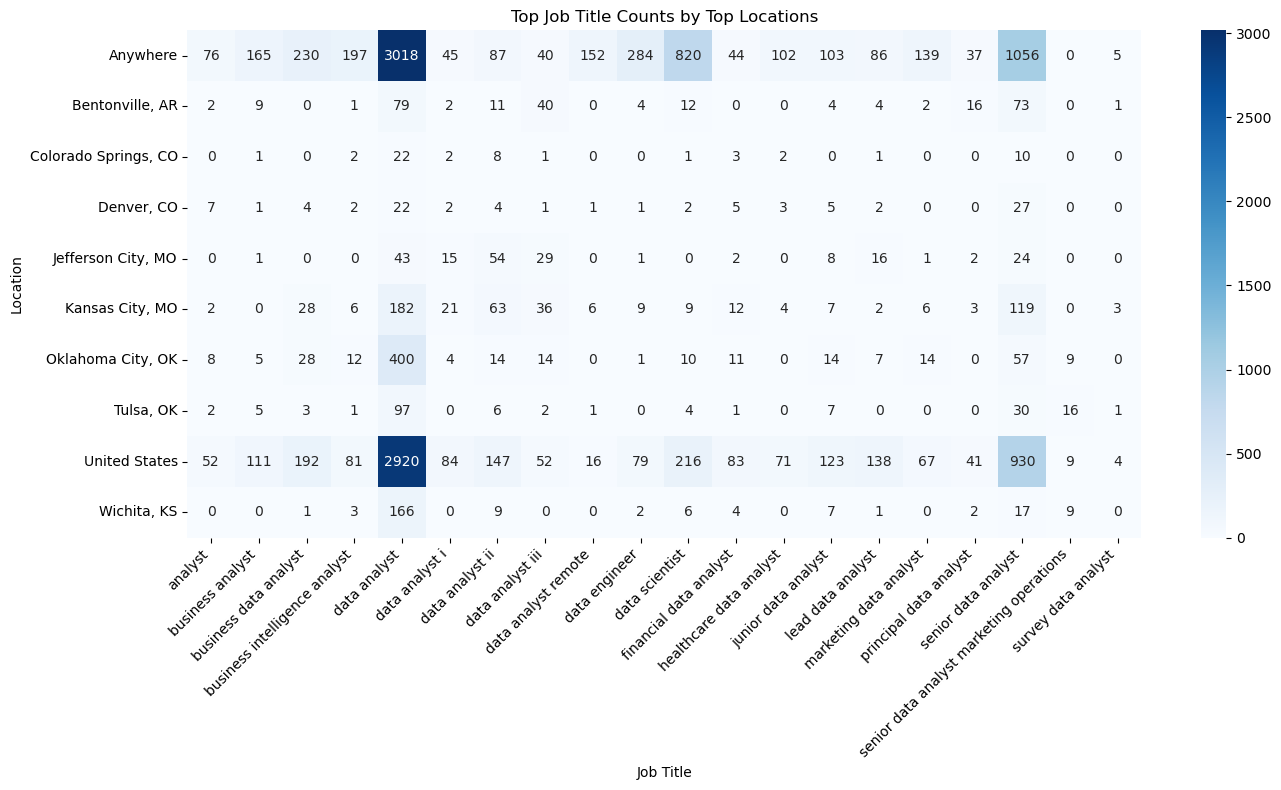

In [42]:
# Get top 10 locations by number of job postings
top_locations = data_csv["location"].value_counts().nlargest(10).index

# Get top 20 job titles by number of postings
top_titles = data_csv["title"].value_counts().nlargest(20).index

# Filter dataframe to only those top categories
filtered_df = data_csv[data_csv["location"].isin(top_locations) & data_csv['title'].isin(top_titles)]

# Group and count occurrences
count_df = filtered_df.groupby(["location", "title"]).size().reset_index(name="count")

# Pivot for heatmap
pivot_df = count_df.pivot(index="location", columns="title", values="count").fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_df, cmap="Blues", annot=True, fmt="g")
plt.title("Top Job Title Counts by Top Locations")
plt.xlabel("Job Title")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

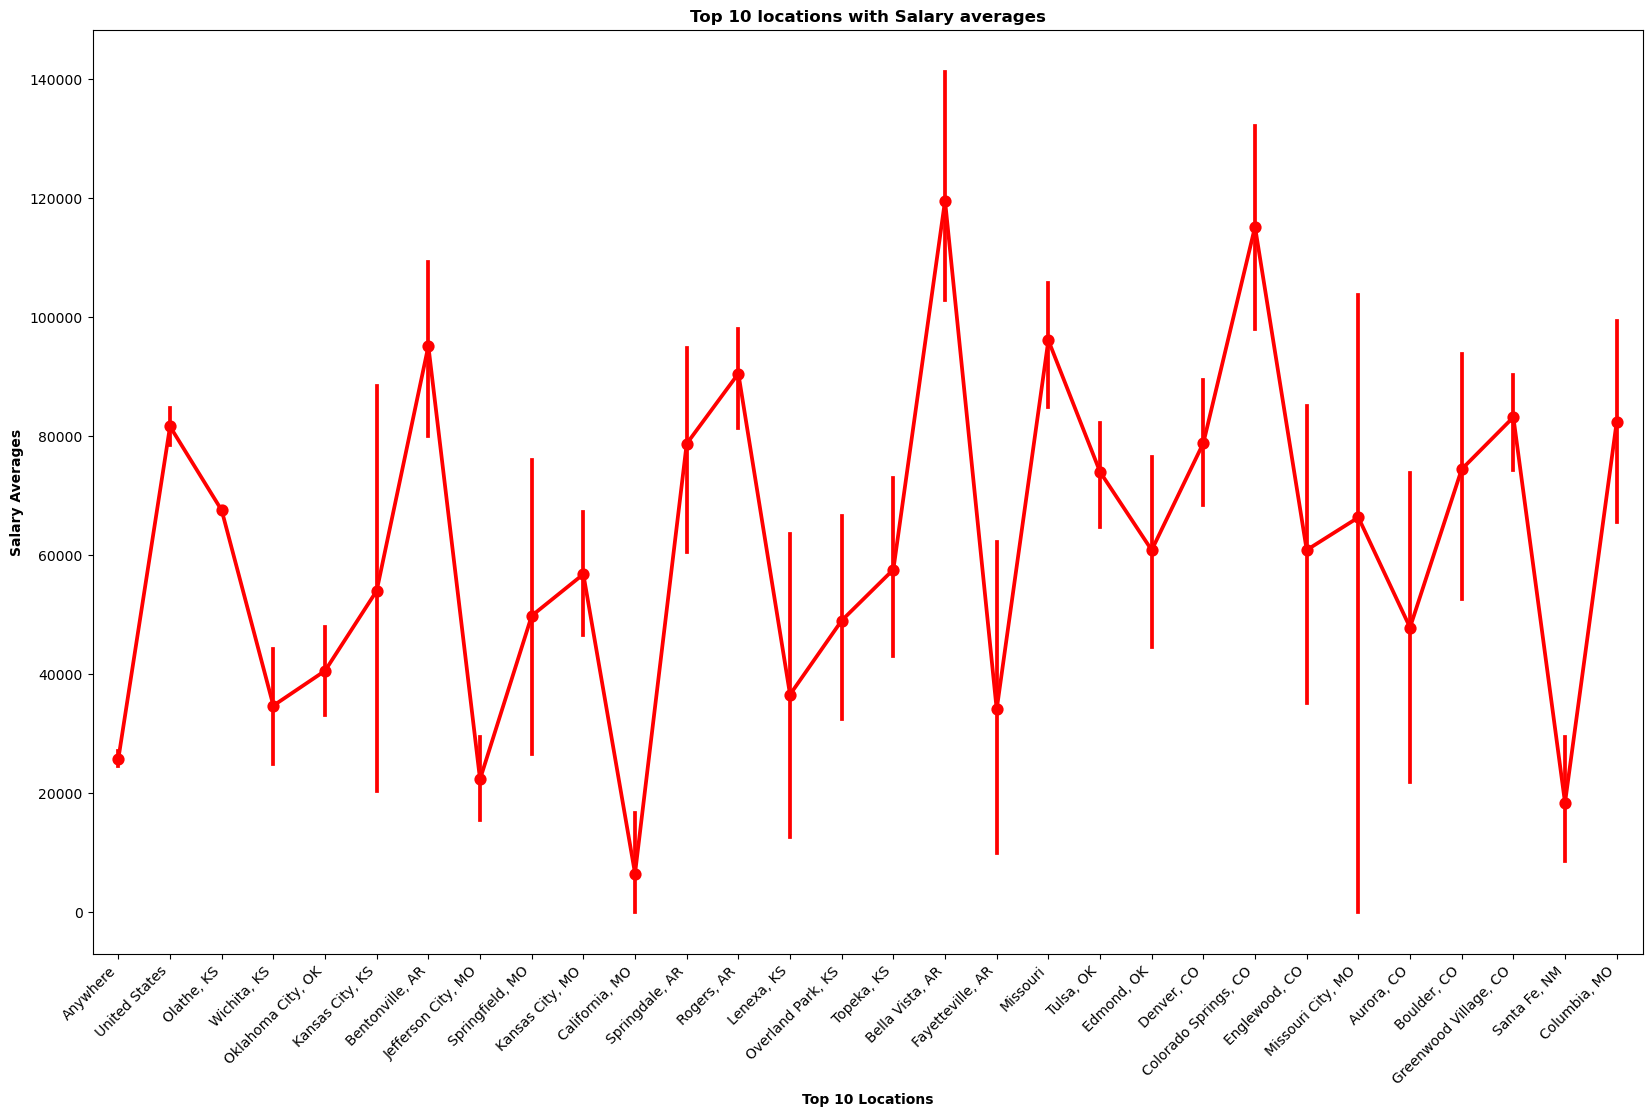

In [35]:
top10_locs = data_csv['location'].value_counts().head(30).index
df_top10_locs = data_csv[data_csv['location'].isin(top10_locs)]

plt.figure(figsize=(20, 12))
sns.pointplot(data=df_top10_locs, x='location', y='salary_avg', color='red')
plt.title('Top 10 locations with Salary averages', weight='bold')
plt.xlabel('Top 10 Locations', weight='bold')
plt.xticks(ha='right', rotation=45)
plt.ylabel('Salary Averages', weight='bold')
plt.show()

In [ ]:
# Convert salary_rate to lowercase and strip whitespace
df['salary_rate_cleaned'] = df['salary_rate'].str.lower().str.strip()

# Convert salary_min and salary_max to numeric
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')

# Convert hourly salaries to yearly
hourly_mask = df['salary_rate_cleaned'] == 'an hour'
df.loc[hourly_mask, 'salary_min'] = df.loc[hourly_mask, 'salary_min'] * 40 * 52
df.loc[hourly_mask, 'salary_max'] = df.loc[hourly_mask, 'salary_max'] * 40 * 52

# Fill NaNs with average values (optional)
df['salary_min'] = df['salary_min'].fillna(df['salary_min'].mean())
df['salary_max'] = df['salary_max'].fillna(df['salary_max'].mean())

# Limit to top job titles
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]

# Calculate average salary_min and salary_max for each title
salary_range = df_top.groupby('title')[['salary_min', 'salary_max']].mean().sort_values(by='salary_max', ascending=False)

# Plot
plt.figure(figsize=(12, 7))
for i, (index, row) in enumerate(salary_range.iterrows()):
    plt.plot([row['salary_min'], row['salary_max']], [index, index], marker='|', color='teal', linewidth=4)

plt.title('Average Salary Range by Job Title')
plt.xlabel('Salary ($)')
plt.ylabel('Job Title')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Multivariate Analysis

In [36]:
df = data_csv.drop(columns=['index', 'Unnamed: 0', 'commute_time'])

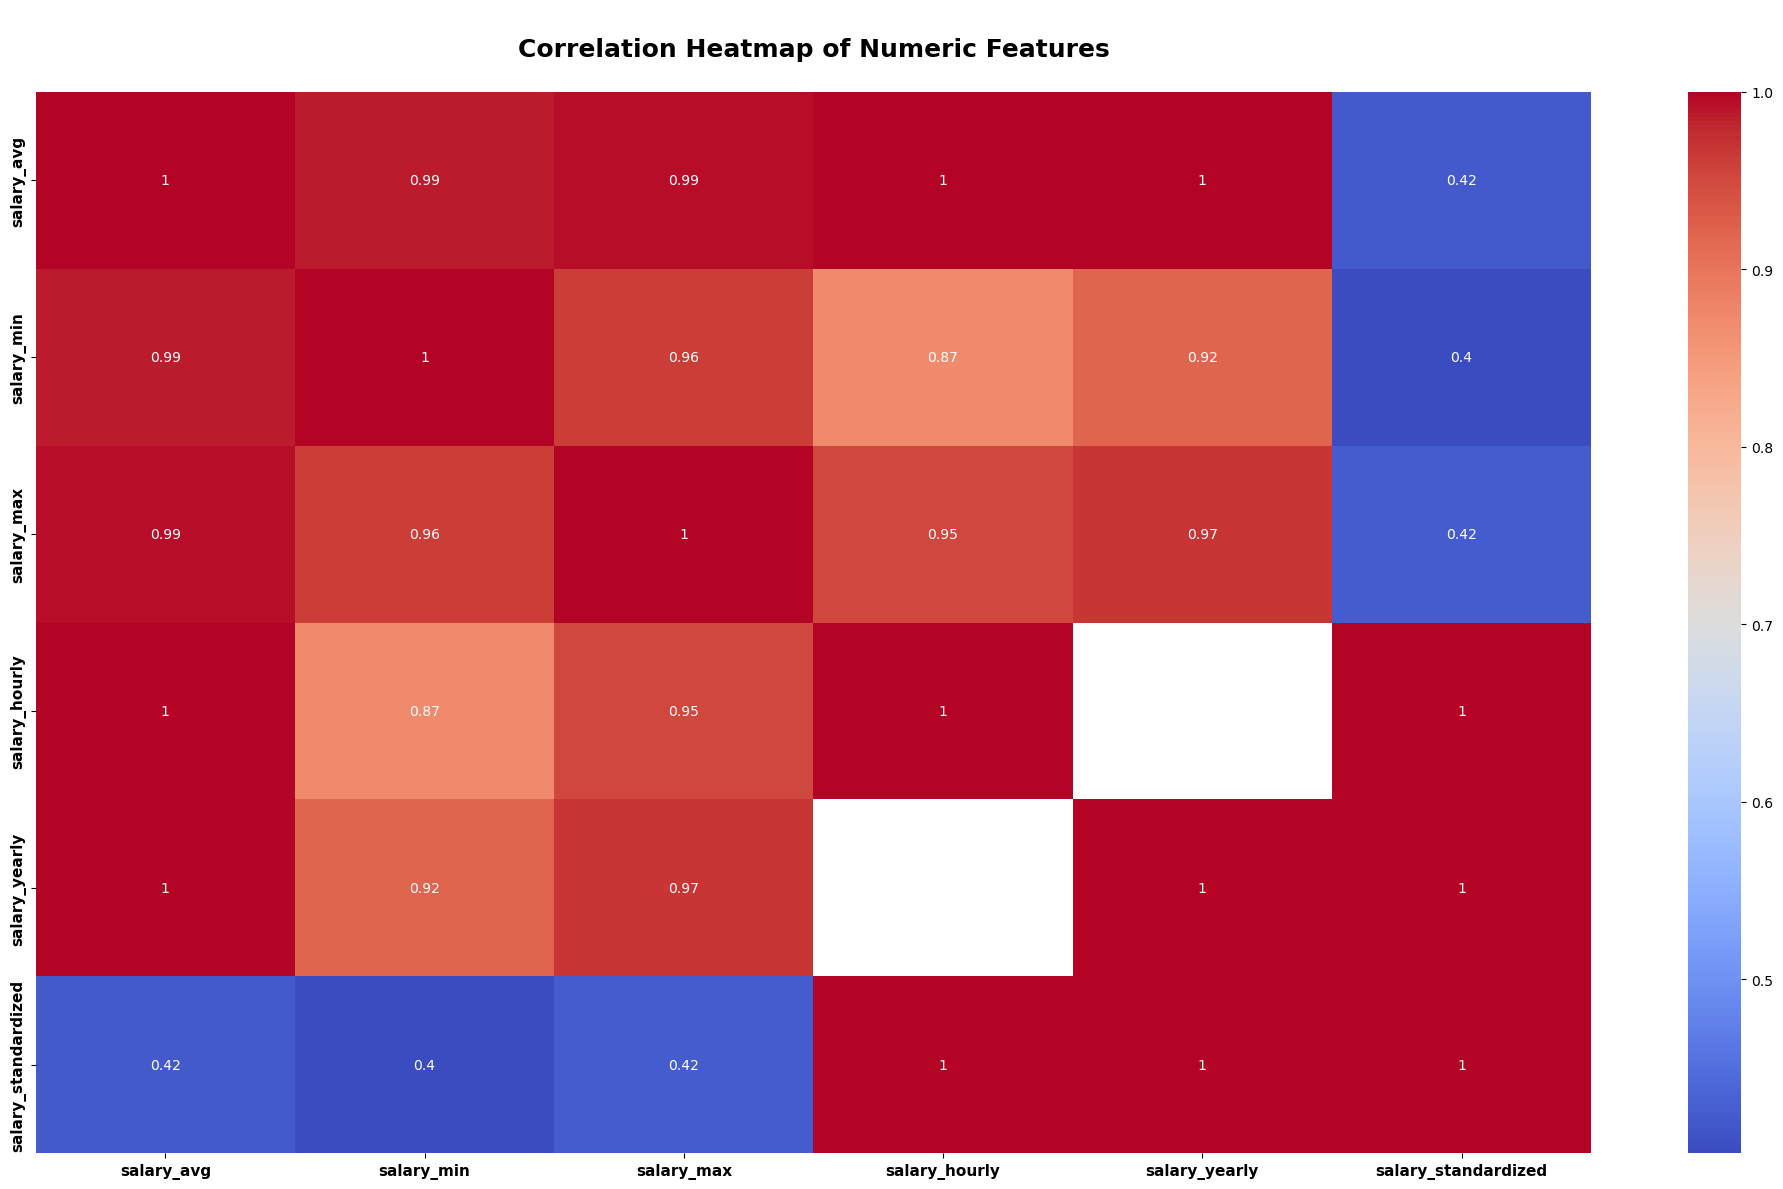

In [37]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('\nCorrelation Heatmap of Numeric Features\n', fontsize=18, weight='bold')
plt.xticks(fontsize=11, weight='bold')
plt.yticks(fontsize=11, weight='bold')
plt.tight_layout()
plt.show()

In [40]:
	
# List of technical skills
skills = [
    "Python", "R", "SQL", "Java", "Scala", "Excel", "Microsoft Excel", "Tableau", "Power BI", 
    "Looker", "Google Sheets", "Matplotlib", "Seaborn", "Apache Airflow", "dbt", "Apache NiFi", 
    "SSIS", "Informatica", "Talend", "MySQL", "PostgreSQL", "Oracle", "Redshift", "Snowflake", 
    "BigQuery", "MongoDB", "AWS", "Azure", "GCP", "Google Cloud Platform", "Apache Spark", 
    "Hadoop", "Kafka", "Hive", "Presto", "Docker", "Kubernetes", "Terraform", "Git", "GitHub", 
    "Scikit-learn", "TensorFlow", "Keras", "XGBoost", "Pandas", "NumPy"
]

# Make sure description has no missing values
df['description'] = df['description'].fillna("")

# Create one column for each skill (True if the skill is mentioned)
for skill in skills:
    df[skill] = df['description'].str.contains(rf'\b{re.escape(skill)}\b', case=False, regex=True)

# Create a list of skills found in each row
def find_skills(text):
    return [skill for skill in skills if re.search(rf'\b{re.escape(skill)}\b', text, re.IGNORECASE)]

df['skills_found'] = df['description'].apply(find_skills)

# Count how often each skill appears
all_skills = [skill for row in df['skills_found'] for skill in row]
skill_counts = Counter(all_skills)

# Put into a DataFrame
skill_df = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Frequency'])

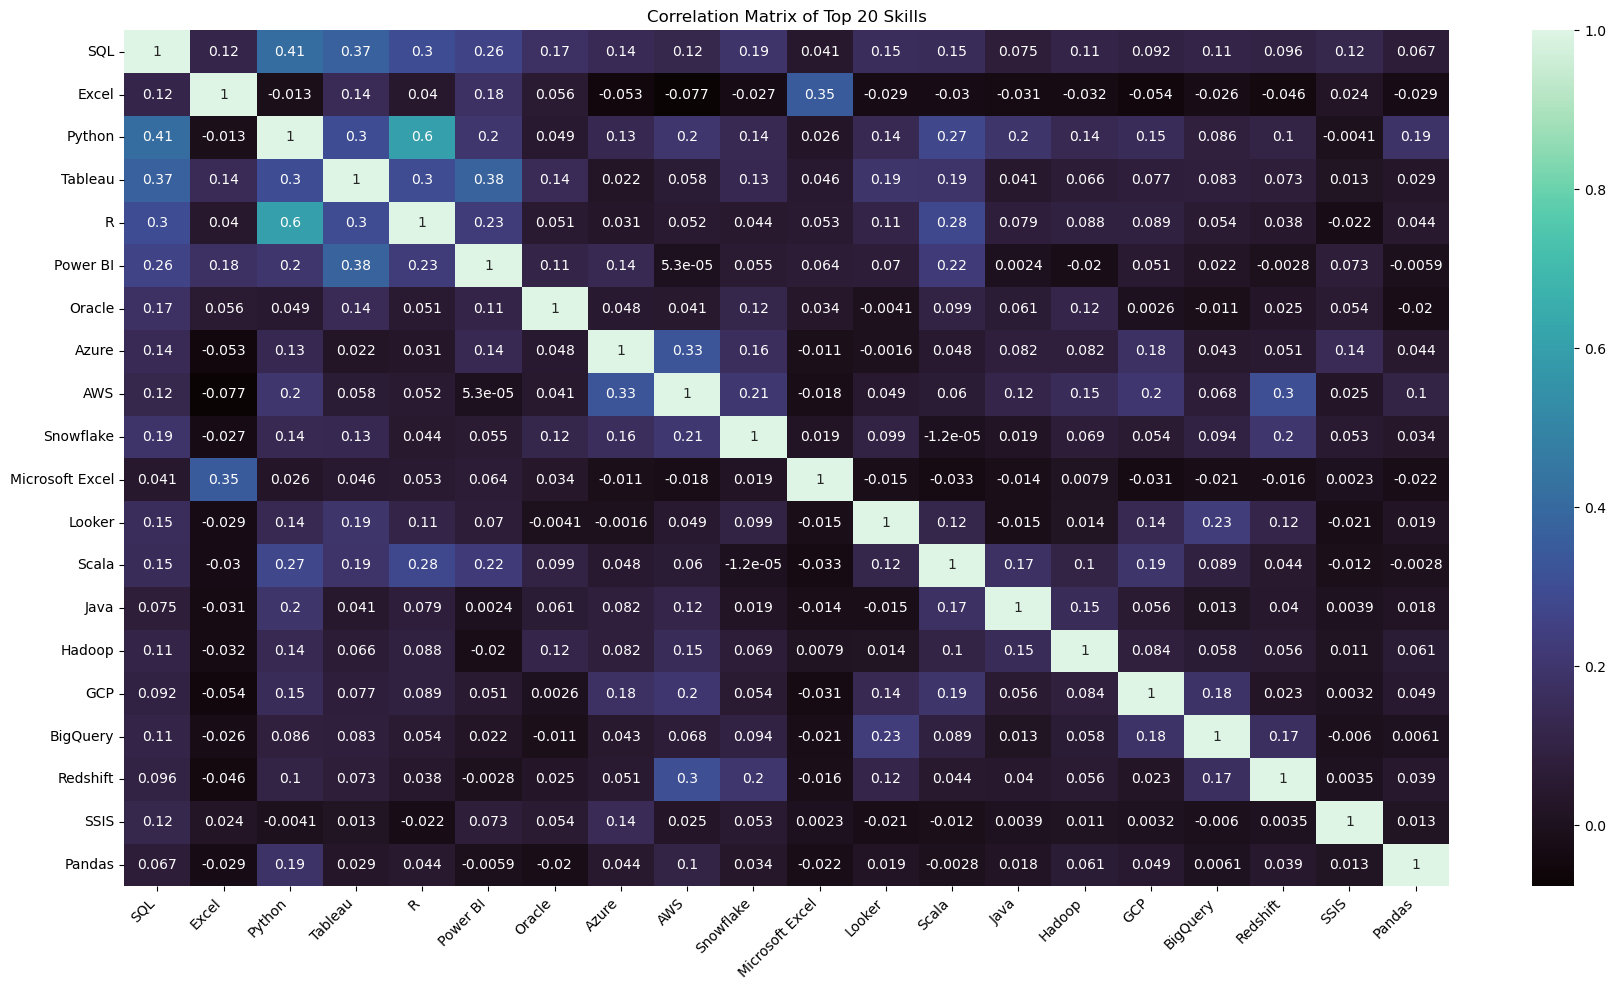

In [41]:
#  Get top 20 skills by sum 
skill_columns = [skill for skill in skills if skill in df.columns]
top_20_skills = df[skill_columns].sum().sort_values(ascending=False).head(20).index.tolist()

# Create correlation matrix only for those top 20 skills
correlation_matrix = df[top_20_skills].corr()

#  Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.title('Correlation Matrix of Top 20 Skills')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()